In [1]:
import os, shutil, pathlib
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
BATCH_SIZE = 32

train_img_gen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=True,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest'
)

validation_img_gen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
)

# 640 , 480  
train_ds = train_img_gen.flow_from_directory('train-data', batch_size=BATCH_SIZE, shuffle=True, class_mode='categorical', target_size=(64*4, 48*4),)
val_ds = validation_img_gen.flow_from_directory('validation-data', batch_size=BATCH_SIZE, shuffle=True, class_mode='categorical', target_size=(64*4, 48*4),)


2023-03-17 12:12:35.073109: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-17 12:12:35.296677: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-17 12:12:35.296743: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-17 12:12:36.434349: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

Found 187 images belonging to 3 classes.
Found 31 images belonging to 3 classes.


In [2]:
train_ds.next()[0].shape

(32, 256, 192, 3)

In [3]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, 5, activation='relu', input_shape=(64*4, 48*4, 3)))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(32, 5, activation='relu'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))
model.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 188, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 94, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 90, 32)       25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 45, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 87840)             0         
                                                                 
 dropout (Dropout)           (None, 87840)             0

2023-03-17 12:12:38.089279: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-17 12:12:38.089412: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-17 12:12:38.089447: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-03-17 12:12:38.089479: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-03-17 12:12:38.089509: W tensorflow/c

In [4]:

history =  model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
6/6 [==============================] - 9s 1s/step - loss: 2.8595 - accuracy: 0.3422 - val_loss: 1.0551 - val_accuracy: 0.3548
Epoch 2/10
6/6 [==============================] - 9s 2s/step - loss: 0.9238 - accuracy: 0.5080 - val_loss: 1.1380 - val_accuracy: 0.5484
Epoch 3/10
6/6 [==============================] - 8s 1s/step - loss: 0.8008 - accuracy: 0.5936 - val_loss: 0.6391 - val_accuracy: 0.8387
Epoch 4/10
6/6 [==============================] - 10s 2s/step - loss: 0.6068 - accuracy: 0.7701 - val_loss: 0.3541 - val_accuracy: 0.8387
Epoch 5/10
6/6 [==============================] - 9s 2s/step - loss: 0.4862 - accuracy: 0.7701 - val_loss: 0.3457 - val_accuracy: 0.8065
Epoch 6/10
6/6 [==============================] - 10s 2s/step - loss: 0.3770 - accuracy: 0.8075 - val_loss: 0.2967 - val_accuracy: 0.8387
Epoch 7/10
6/6 [==============================] - 9s 2s/step - loss: 0.3968 - accuracy: 0.7861 - val_loss: 0.2636 - val_accuracy: 0.9032
Epoch 8/10
6/6 [=======================

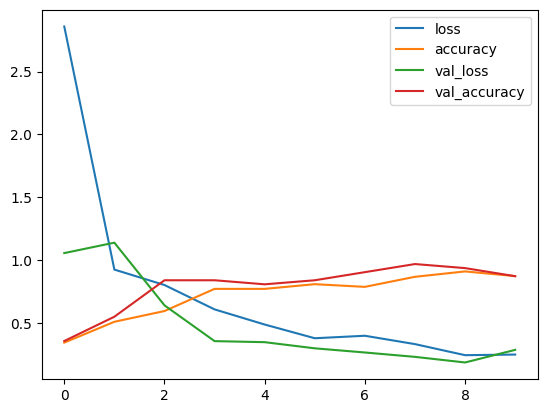

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df_hist = pd.DataFrame(history.history)
plt.show()

plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["accuracy"], label = "accuracy")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_accuracy")
plt.legend()
plt.show()

In [8]:
test_img_gen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
)
single = test_img_gen.flow_from_directory('single-test', batch_size=BATCH_SIZE, shuffle=True, class_mode='categorical', target_size=(64*4, 48*4),)
image = single.next()[0][:1]

model.predict(image)

Found 1 images belonging to 1 classes.
1/1 [==============================] - 0s 27ms/step


array([[0.00777549, 0.94188714, 0.05033735]], dtype=float32)

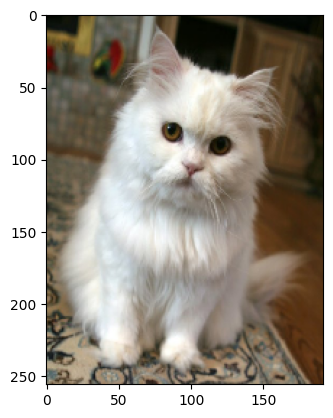

In [9]:
import matplotlib.pyplot as plt

plt.imshow(image[0])